### Introduction
The project is about extracting relevant key performance indicator (KPIs) and metrics that can be used by PhoneNow to view the long-term trends in customer and agent behaviour. PhoneNow is a telecommunication company interested in visualizing data in such a way that important aspects become very clear.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling

### Data Gathering

In [2]:
#load the dataset
df = pd.read_excel('01-Call-Center-Dataset.xlsx')

### Assessing Data

### Visual Assessment

In [3]:
#show all rows and columns from dataset
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0


### Programmatic Assessment

In [4]:
#list first 5 rows
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


In [5]:
#check the number of rows, columns, datatypes and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [6]:
#check basic statistics
df.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


In [7]:
#check basic statistics
df.describe(include='all')

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
count,5000,5000,5000,5000,5000,5000,5000,4054.000000,4054,4054.000000
unique,5000,8,90,375,5,2,2,NaN,391,NaN
top,ID0001,Jim,2021-01-11,11:55:41,Streaming,Y,Y,NaN,00:04:43,NaN
freq,1,666,84,30,1022,4054,3646,NaN,22,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.520720,NaN,3.403552
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.592872,NaN,1.212220
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,NaN,4.000000


In [8]:
#check for null values
df.isna().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
dtype: int64

In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
#check the unique values in Agent
df.Agent.unique()

array(['Diane', 'Becky', 'Stewart', 'Greg', 'Jim', 'Joe', 'Martha', 'Dan'],
      dtype=object)

In [11]:
#check the unique values in Topic
df.Topic.unique()

array(['Contract related', 'Technical Support', 'Payment related',
       'Admin Support', 'Streaming'], dtype=object)

### Tidiness issues

* Date and Time columns are in separate columns

### Quality issues

* `Date` column is string/object datatype
* `Answered (Y/N)` column name will not be easy to work with
* `Speed of answer in seconds` column name is too long
* `Satisfaction rating` column name has space in-between
* `Call Id` column name has space in-between

### Cleaning

### Tidiness Issues

In [12]:
#make a copy of the dataset before cleaning
df_copy = df.copy()

#### Define
I will create a new column `DateTime` that will combine both the date and time

#### Code

In [13]:
#create a new column 
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

#### Test

In [14]:
#list the columns datatype
df.dtypes

Call Id                               object
Agent                                 object
Date                                  object
Time                                  object
Topic                                 object
Answered (Y/N)                        object
Resolved                              object
Speed of answer in seconds           float64
AvgTalkDuration                       object
Satisfaction rating                  float64
DateTime                      datetime64[ns]
dtype: object

### Quality Issues

#### Define
I will change the datatype of Date to datetimestamp

#### Code

In [15]:
#change Date datatype to datetime
df.Date = pd.to_datetime(df.Date)

#### Test

In [16]:
#list the Date column datatype
df.dtypes

Call Id                               object
Agent                                 object
Date                          datetime64[ns]
Time                                  object
Topic                                 object
Answered (Y/N)                        object
Resolved                              object
Speed of answer in seconds           float64
AvgTalkDuration                       object
Satisfaction rating                  float64
DateTime                      datetime64[ns]
dtype: object

#### Define
I will rename `Answered (Y/N)` column to `Answered`

#### Code

In [17]:
#rename column
df.rename(columns={'Answered (Y/N)':'Answered'},inplace=True)

#### Test

In [18]:
#list the columns we have
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered', 'Resolved',
       'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating',
       'DateTime'],
      dtype='object')

#### Define
I will rename `Speed of answer in seconds` to `AnsweringSpeed`

#### Code

In [19]:
#rename column
df.rename(columns={'Speed of answer in seconds':'AnsweringSpeed'},inplace=True)

#### Test

In [20]:
#list the columns we have
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered', 'Resolved',
       'AnsweringSpeed', 'AvgTalkDuration', 'Satisfaction rating', 'DateTime'],
      dtype='object')

#### Define
I will rename `Satisfaction rating` to `SatisfactionRating`

#### Code

In [21]:
#rename column
df.rename(columns={'Satisfaction rating':'SatisfactionRating'},inplace=True)

#### Test

In [22]:
#list the columns we have
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered', 'Resolved',
       'AnsweringSpeed', 'AvgTalkDuration', 'SatisfactionRating', 'DateTime'],
      dtype='object')

#### Define
I will rename `Call Id` to `CallID`

#### Code

In [23]:
#rename column
df.rename(columns={'Call Id':'CallID'},inplace=True)

#### Test

In [24]:
#list the columns we have
df.columns

Index(['CallID', 'Agent', 'Date', 'Time', 'Topic', 'Answered', 'Resolved',
       'AnsweringSpeed', 'AvgTalkDuration', 'SatisfactionRating', 'DateTime'],
      dtype='object')

In [25]:
df.shape

(5000, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CallID              5000 non-null   object        
 1   Agent               5000 non-null   object        
 2   Date                5000 non-null   datetime64[ns]
 3   Time                5000 non-null   object        
 4   Topic               5000 non-null   object        
 5   Answered            5000 non-null   object        
 6   Resolved            5000 non-null   object        
 7   AnsweringSpeed      4054 non-null   float64       
 8   AvgTalkDuration     4054 non-null   object        
 9   SatisfactionRating  4054 non-null   float64       
 10  DateTime            5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 429.8+ KB


### Visualization

### Dataset structure
The master dataset that I will be using has 5,000 rows and 11 columns. 7 of the features datatypes are object(strings) while 2 are datetime datatype, and 2 are float.

### Main feature(s) of interest in your dataset
My main features of interest are those ones that help PhoneNow to view the long-term trends in customer and agent behaviour. They are: `Topic`, `Answered`, `Resolved`, `AnsweringSpeed`, `AvgTalkDuration`, `SatisfactionRating`.

### Features in the dataset that will help support my investigation into the feature(s) of interest
I will use `Agent`, `Date`, `Time`, and `DateTime` to give more context to my findings.

### Univariate Exploration¶
I will start my exploration with `Topic`, one of my main features of interest

In [27]:
#see the unique values in Topic
df.Topic.unique()

array(['Contract related', 'Technical Support', 'Payment related',
       'Admin Support', 'Streaming'], dtype=object)

In [28]:
#get the count of each value
df.Topic.value_counts()

Streaming            1022
Technical Support    1019
Payment related      1007
Contract related      976
Admin Support         976
Name: Topic, dtype: int64

In [29]:
#get the count of each value and convert all to a dataframe
df_topic = df.Topic.value_counts().reset_index(name='count')
df_topic.rename(columns={'index':'Topic'},inplace=True)

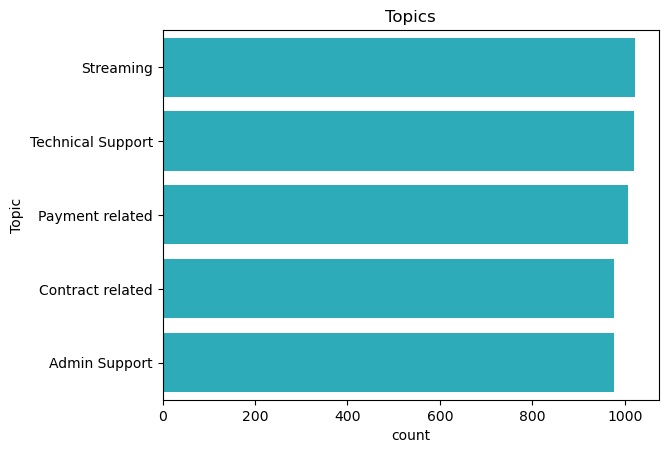

In [30]:
#plot the barchart of each Topic against its frequency
base_color = sns.color_palette()[9]
sns.barplot(data= df_topic, y = 'Topic', x ='count', color=base_color);
plt.title('Topics');


Next is to analyze the `Answered` column

In [31]:
#see the unique values in `Answered`
df.Answered.unique()

array(['Y', 'N'], dtype=object)

In [32]:
#get the counts of the 2 values in Answered
df.Answered.value_counts()

Y    4054
N     946
Name: Answered, dtype: int64

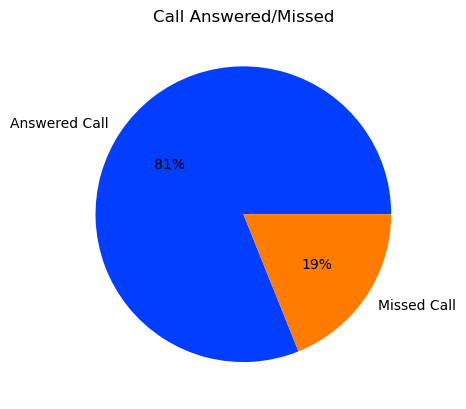

In [33]:
#set the data and the labels
data = df.Answered.value_counts()
keys = ['Answered Call','Missed Call']
palette_color = sns.color_palette('bright');
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%');
plt.title('Call Answered/Missed');

I will now analyze the `Resolved` feature

In [34]:
#see the unique values in `Resolved`
df.Resolved.unique()

array(['Y', 'N'], dtype=object)

In [35]:
#get the counts of the 2 values in Resolved
df.Resolved.value_counts()

Y    3646
N    1354
Name: Resolved, dtype: int64

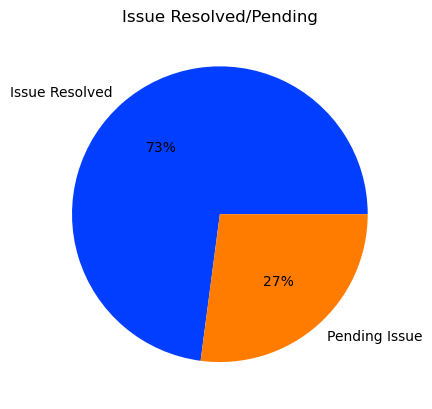

In [36]:
#set the data and the labels
data = df.Resolved.value_counts()
keys = ['Issue Resolved','Pending Issue']
palette_color = sns.color_palette('bright');
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%');
plt.title('Issue Resolved/Pending');

### Bivariate Exploration¶
In order to uncover more insights, I will need to explore more bivariate relationships

#### Agent Vs. Topic

In [37]:
#arrange the data based on agent
df.groupby(by='Agent').Resolved.count()

Agent
Becky      631
Dan        633
Diane      633
Greg       624
Jim        666
Joe        593
Martha     638
Stewart    582
Name: Resolved, dtype: int64

In [38]:
#arrange the data based on agent
df.groupby(by='Agent').get_group('Becky')

,CallID,Agent,Date,Time,Topic,Answered,Resolved,AnsweringSpeed,AvgTalkDuration,SatisfactionRating,DateTime
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,2021-01-01 09:12:58
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,2021-01-01 10:00:29
14,ID0015,Becky,2021-01-01,11:55:41,Admin Support,Y,Y,48.0,00:03:47,4.0,2021-01-01 11:55:41
15,ID0016,Becky,2021-01-01,11:55:41,Admin Support,Y,Y,63.0,00:05:26,2.0,2021-01-01 11:55:41
17,ID0018,Becky,2021-01-01,11:57:07,Admin Support,N,N,NaN,NaN,NaN,2021-01-01 11:57:07
...,...,...,...,...,...,...,...,...,...,...,...
4957,ID4958,Becky,2021-03-30,12:46:05,Payment related,Y,N,116.0,00:03:05,4.0,2021-03-30 12:46:05
4964,ID4965,Becky,2021-03-30,15:50:24,Admin Support,N,N,NaN,NaN,NaN,2021-03-30 15:50:24
4979,ID4980,Becky,2021-03-31,10:49:26,Admin Support,Y,Y,37.0,00:04:19,5.0,2021-03-31 10:49:26
4980,ID4981,Becky,2021-03-31,11:08:10,Admin Support,Y,Y,23.0,00:04:47,4.0,2021-03-31 11:08:10


In [39]:
df.Agent

0         Diane
1         Becky
2       Stewart
3          Greg
4         Becky
         ...   
4995        Jim
4996      Diane
4997      Diane
4998        Jim
4999      Diane
Name: Agent, Length: 5000, dtype: object

#### Agent Vs. AnsweringSpeed
It is time to know the answering speed of each agent. In order to analyze this, I will calculate the average answering speed for each agent and plot it against the respective agent

In [40]:
#arrange the data based on agent and obtain the average of the `AnsweringSpeed`
agent_speed_df = df.groupby(by='Agent')['AnsweringSpeed'].mean()
#convert it to a dataframe for plotting
agent_speed_df = agent_speed_df.reset_index()
agent_speed_df.sort_values(by = ['AnsweringSpeed'], ascending=False, inplace=True)
agent_speed_df

,Agent,AnsweringSpeed
5,Joe,70.987603
6,Martha,69.488327
3,Greg,68.444223
1,Dan,67.282983
4,Jim,66.343284
2,Diane,66.267465
7,Stewart,66.184486
0,Becky,65.330754


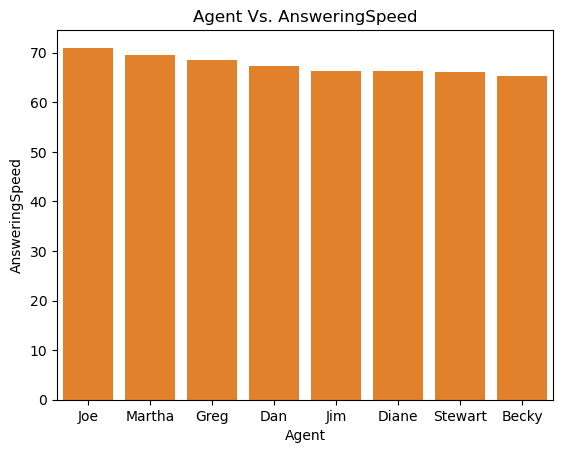

In [41]:
#plot the data
base_color = sns.color_palette()[1]
sns.barplot(data= agent_speed_df, y = 'AnsweringSpeed', x ='Agent', color=base_color);
plt.title('Agent Vs. AnsweringSpeed');

The chart shows that Joe, Martha, Greg, and Dan have the highest average answering speed. However, Jim, Diane, and Stewart have almost the same average answering speed. Becky has the lowest average answering speed.

#### Agent Vs. Average Talk Duration
I will now map each agent to their average talk duration. This will involve converting the average talk duration to seconds

In [42]:
df.dtypes

CallID                        object
Agent                         object
Date                  datetime64[ns]
Time                          object
Topic                         object
Answered                      object
Resolved                      object
AnsweringSpeed               float64
AvgTalkDuration               object
SatisfactionRating           float64
DateTime              datetime64[ns]
dtype: object

In [43]:
#show the average talk duration
df.AvgTalkDuration

0       00:02:23
1       00:04:02
2       00:02:11
3       00:00:37
4       00:01:00
          ...   
4995    00:05:40
4996    00:03:16
4997    00:01:49
4998    00:00:58
4999         NaN
Name: AvgTalkDuration, Length: 5000, dtype: object

In [44]:
#convert time given into seconds
def to_seconds(time_val):
    time_val = str(time_val)
    time_val = time_val.split(':')
    if(len(time_val) > 1):#skip NaN
        [hours,minutes,seconds] = time_val
        hours = int(hours) * 60 * 60
        minutes = int(minutes) * 60
        seconds = int(seconds)
        return (hours+minutes+seconds)
    else:#0 will be returned for all NaN
        return 0

In [45]:
#see the datatypes
df.dtypes

CallID                        object
Agent                         object
Date                  datetime64[ns]
Time                          object
Topic                         object
Answered                      object
Resolved                      object
AnsweringSpeed               float64
AvgTalkDuration               object
SatisfactionRating           float64
DateTime              datetime64[ns]
dtype: object

In [46]:
#create another column for average talk duration in seconds
df['AvgTalkDurationSeconds'] = df.AvgTalkDuration.apply(to_seconds)
df.head()

,CallID,Agent,Date,Time,Topic,Answered,Resolved,AnsweringSpeed,AvgTalkDuration,SatisfactionRating,DateTime,AvgTalkDurationSeconds
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,2021-01-01 09:12:58,143
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,2021-01-01 09:12:58,242
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,2021-01-01 09:47:31,131
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,2021-01-01 09:47:31,37
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,2021-01-01 10:00:29,60


In [47]:
#re-arrange the data based on agent and obtain the average of the `AvgTalkDurationSeconds`
agent_talk_duration_df = df.groupby(by='Agent')['AvgTalkDurationSeconds'].mean()
#convert it to a dataframe for plotting
agent_talk_duration_df = agent_talk_duration_df.reset_index()
agent_talk_duration_df.sort_values(by = ['AvgTalkDurationSeconds'], ascending=False, inplace=True)
agent_talk_duration_df

,Agent,AvgTalkDurationSeconds
1,Dan,191.014218
7,Stewart,185.395189
4,Jim,183.587087
5,Joe,182.908938
3,Greg,182.459936
0,Becky,180.261490
6,Martha,180.242947
2,Diane,173.295419


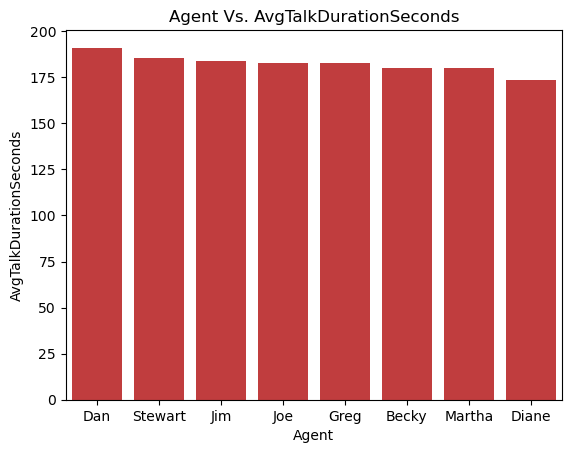

In [48]:
#plot the data
base_color = sns.color_palette()[3]
sns.barplot(data= agent_talk_duration_df, y = 'AvgTalkDurationSeconds', x ='Agent', color=base_color);
plt.title('Agent Vs. AvgTalkDurationSeconds');

The plot shows that Dan, Stewart, and Jim have the highest average talk duration in seconds. Joe and Greg have almost the same duration, same thing occurred with Becky and Martha. Diane has the least average talk duration in seconds.

#### Agent Vs. SatisfactionRating
I will now analyze the Agent and SatisfactionRating in order to know how the agents perform against the satisfaction rating given by customers. I will take the average satisfaction rating for each agent and show it on a graph.

In [58]:
df.SatisfactionRating.value_counts()

3.0    1218
4.0    1180
5.0     843
1.0     417
2.0     396
Name: SatisfactionRating, dtype: int64

In [49]:
#arrange the data based on agent and obtain the average of the `SatisfactionRating`
agent_rating_df = df.groupby(by='Agent')['SatisfactionRating'].mean()
#convert it to a dataframe for plotting
agent_rating_df = agent_rating_df.reset_index()
agent_rating_df.sort_values(by = ['SatisfactionRating'], ascending=False, inplace=True)
agent_rating_df

,Agent,SatisfactionRating
6,Martha,3.470817
1,Dan,3.447419
2,Diane,3.405190
3,Greg,3.404382
7,Stewart,3.400419
4,Jim,3.393657
0,Becky,3.371373
5,Joe,3.330579


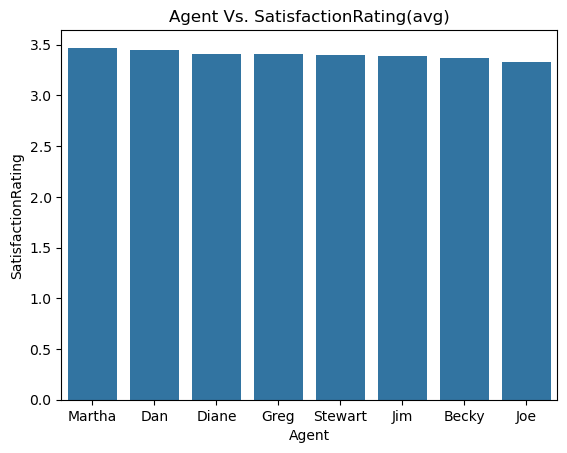

In [50]:
#plot the data
base_color = sns.color_palette()[0]
sns.barplot(data= agent_rating_df, y = 'SatisfactionRating', x ='Agent', color=base_color);
plt.title('Agent Vs. SatisfactionRating(avg)');

The chart shows that average satisfaction rating given by customers for each agent is not even up to 3.5

#### Agent Vs. Answered
Knowing the rate at which each agent answered or missed a call is an import statistics to know. I will make a plot to display the statistics

In [51]:
#get the agent names
agents = df.Agent.unique()
#function counts the number of answered and missed calls for each agent
def agents_answered_count():
    agents_dic_list = []#store the dictionaries
    for agent in agents:
        agents_dic = {}
        agt_df = df.query("Agent == @agent")#get the dataframe for only am agent
        agents_dic['Agent'] = agent
        agents_dic['Answered'] = agt_df.query("Answered == 'Y'")['Answered'].count()
        agents_dic['Missed'] = agt_df.query("Answered == 'N'")['Answered'].count()
        agents_dic_list.append(agents_dic)
    return agents_dic_list
#create a new dataframe
agents_answered_df = pd.DataFrame.from_dict(agents_answered_count())
agents_answered_df

,Agent,Answered,Missed
0,Diane,501,132
1,Becky,517,114
2,Stewart,477,105
3,Greg,502,122
4,Jim,536,130
5,Joe,484,109
6,Martha,514,124
7,Dan,523,110


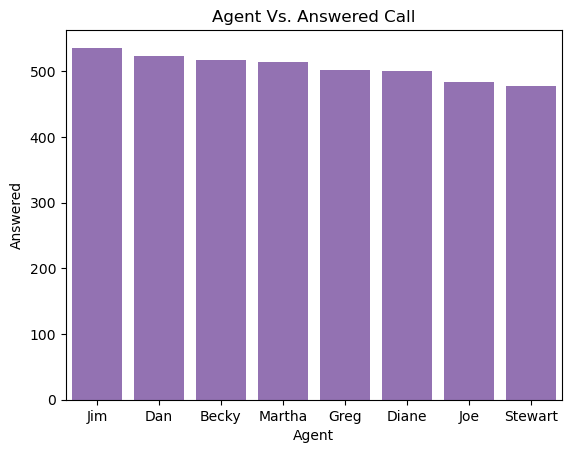

In [52]:
#plot the graph for the calls answered for each agent  
base_color = sns.color_palette()[4]
agents_answered_df.sort_values(by='Answered',inplace=True,ascending=False)
plot1 = sns.barplot(data= agents_answered_df, y = 'Answered', x ='Agent', color=base_color);
plt.title('Agent Vs. Answered Call');

The plot shows that Jim and Dan have the highest number of calls answered, while Stewart has the lowest number of calls answerd.

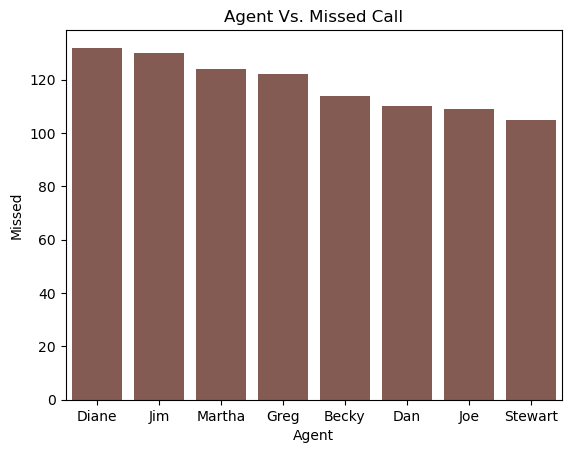

In [53]:
#plot the graph for the calls missed for each agent
base_color = sns.color_palette()[5]
agents_answered_df.sort_values(by='Missed',inplace=True,ascending=False)
plot2 = sns.barplot(data= agents_answered_df, y = 'Missed', x ='Agent', color=base_color);
plt.title('Agent Vs. Missed Call');

The plot shows that Diane and Jim have the highest number of calls missed, while Stewart has the lowest number of calls missed.

#### Agent Vs. Resolved
I will now analyze the issues resolved by each agent

In [54]:
df.columns

Index(['CallID', 'Agent', 'Date', 'Time', 'Topic', 'Answered', 'Resolved',
       'AnsweringSpeed', 'AvgTalkDuration', 'SatisfactionRating', 'DateTime',
       'AvgTalkDurationSeconds'],
      dtype='object')

In [55]:
#get the agent names
agents = df.Agent.unique()
#function counts the number of answered and missed calls for each agent
def agents_resolved_count():
    agents_dic_list = []#store the dictionaries
    for agent in agents:
        agents_dic = {}
        agt_df = df.query("Agent == @agent")#get the dataframe for only am agent
        agents_dic['Agent'] = agent
        agents_dic['Resolved'] = agt_df.query("Resolved == 'Y'")['Resolved'].count()
        agents_dic['Unresolved'] = agt_df.query("Resolved == 'N'")['Resolved'].count()
        agents_dic_list.append(agents_dic)
    return agents_dic_list
#create a new dataframe
agents_resolved_df = pd.DataFrame.from_dict(agents_resolved_count())
agents_resolved_df

,Agent,Resolved,Unresolved
0,Diane,452,181
1,Becky,462,169
2,Stewart,424,158
3,Greg,455,169
4,Jim,485,181
5,Joe,436,157
6,Martha,461,177
7,Dan,471,162


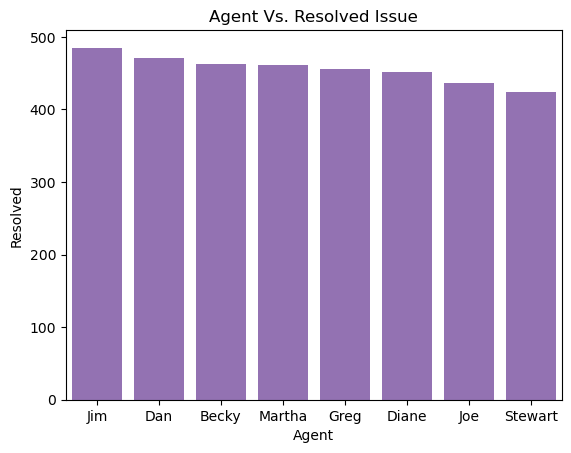

In [56]:
#plot the graph for the issues resolved for each agent  
base_color = sns.color_palette()[4]
agents_resolved_df.sort_values(by='Resolved',inplace=True,ascending=False)
plot1 = sns.barplot(data= agents_resolved_df, y = 'Resolved', x ='Agent', color=base_color);
plt.title('Agent Vs. Resolved Issue');

In the graph above, Jim and Dan resolved the highest number of issues, while Stewart resolved the lowest number of issues

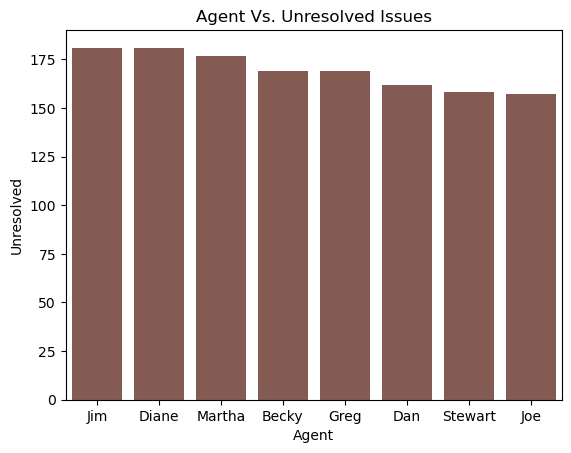

In [57]:
#plot the graph for the issues unresolved for each agent
base_color = sns.color_palette()[5]
agents_resolved_df.sort_values(by='Unresolved',inplace=True,ascending=False)
plot2 = sns.barplot(data= agents_resolved_df, y = 'Unresolved', x ='Agent', color=base_color);
plt.title('Agent Vs. Unresolved Issues');

In the plot above, Jim and Diane have the highest number of issues unresolved, while Joe has the lowest number of issues unresolved